Exercise from Think Stats, 2nd Edition (thinkstats2.com)<br>
Allen Downey

In [112]:
%matplotlib inline

Using the data from the BRFSS, compute the linear least squares fit for log(weight) versus height. How would you best present the estimated parameters for a model like this where one of the variables is log-transformed? If you were trying to guess someone’s weight, how much would it help to know their height? 

In [113]:
import brfss
import thinkstats2
import numpy as np
import math
import thinkplot

In [114]:
data = brfss.ReadBrfss()
data.head(5)

,age,sex,wtyrago,finalwt,wtkg2,htm3
0,82,2,76.363636,185.870345,70.91,157
1,65,2,72.727273,126.603027,72.73,163
2,48,2,NaN,181.063210,NaN,165
3,61,1,73.636364,517.926275,73.64,170
4,26,1,88.636364,1252.624630,88.64,185


The data has 6 columns with the headers: age, sex, weight one year ago, final weight, weight in kg, and height. Next we can check is this data needs cleaning

In [115]:
data.isnull().sum()

age         3653
sex            0
wtyrago    24110
finalwt        0
wtkg2      16025
htm3        5380
dtype: int64

Oh yikes, that means that a lot of the data is null. We can call the clean function in brfss

In [126]:
data = data.dropna(subset = ['wtkg2', 'htm3'])

In [127]:
data.head(5)

,age,sex,wtyrago,finalwt,wtkg2,htm3
0,82,2,76.363636,185.870345,70.91,157
1,65,2,72.727273,126.603027,72.73,163
3,61,1,73.636364,517.926275,73.64,170
4,26,1,88.636364,1252.624630,88.64,185
5,42,1,118.181818,415.161314,109.09,183


In [130]:
import math
intercept, slope = thinkstats2.LeastSquares(np.log(data.wtkg2), data.htm3)
print intercept
print slope

68.0232589936
23.2493214367


I would best present the parameters in a graph.

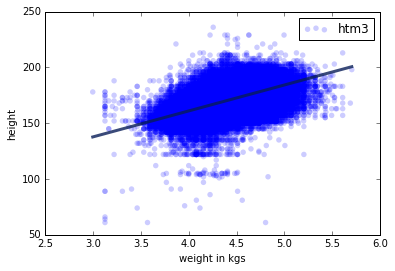

In [131]:
thinkplot.Scatter(np.log(data.wtkg2), data.htm3);
fit_xs, fit_ys = thinkstats2.FitLine(np.log(data.wtkg2), intercept, slope)
thinkplot.plot(fit_xs, fit_ys)
thinkplot.Show(xlabel = 'weight in kgs', ylabel = 'height')

The graph plot above plots the weights data is on a log scale. Then we can see a line of best fit on top of the scatter plot. This fitted line is characterized by the intercept and slope found above. This seems like a pretty good fit, it looks like it piecres through even sides of the data. 

In [ ]:
fit_xs, fit_ys = thinkstats2.FitLine(np.log(data.wtkg2), intercept, slope)

The equation to this line of best fit is ys = slope*xs + intercept. Therefore, in this case it would be heights = 23.2493214367*log(weight) + 68.0232589936. The x axis is on a log scale, therefore we can think about the data in terms of decades. Currently on the x-axis we have log(weights). We should translate this to weight in normal kilograms to understand this. We can do this by raising to the 10th power, assuming the log is base 10, so 10^(log(weights))

In [142]:
#we can calculate the mean and then round to be an integer, it's just an approximation
mean_rounded = np.int(fit_xs.mean())
print "mean approx", mean_rounded

mean approx 4


In [143]:
##this gets up back into something we can understand
weight_kgs = 10^(np.int(fit_xs.mean()))
print "mean weight in kgs", weight_kgs

weight in kgs 14


This means that the mean person is around 14 kgs or 30.86 pounds. Perhaps this data is for babies? If that mean person is 14 kgs, then we can calculate the height

In [146]:
mean_height = 23.2493214367*np.log(14) + 68.0232589936
print "mean height", mean_height

mean height 129.37955114


According to my interpretation, the mean height for a person that weights 14 kgs is around 129.37 cm? 

In [148]:
thinkstats2.Residuals(np.log(data.wtkg2), data.htm3, intercept, slope)

array([-10.09818397,  -4.68737959,   2.02352899, ...,   5.1253236 ,
       -15.40450744,   9.59807206])

In [152]:
bins = np.arange(5, 50, 5)
indices = np.digitize(np.log(data.wtkg2), bins)
groups = data.groupby(indices)

(0, 393895)
(1, 1937)


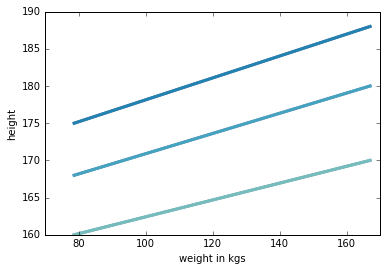

In [154]:
for i, group in groups: 
    print (i, len(group))
    
    ages= [group.wtkg2.mean() for i, group in groups]
    cdfs = [thinkstats2.Cdf(group.htm3) for i, group in groups]

    for percent in [75, 50, 25]: 
        birthweights = [cdf.Percentile(percent) for cdf in cdfs]
        label = '%dth' % percent
        
        thinkplot.Plot(ages, birthweights); 
        

thinkplot.Show(xlabel = 'weight in kgs', ylabel = 'height')

well these lines are very straight. This means that our data is very linear and the mean is 120 kgs. The range between these lines is 30. From this, we can guess the their weight approximately (100/30) = 3.33% of the time. Therefore, it would help A LOT to know a person's weight in order to be able to guess their height.

## Clarifying Questions

Use this space to ask questions regarding the content covered in the reading. These questions should be restricted to helping you better understand the material. For questions that push beyond what is in the reading, use the next answer field. If you don't have a fully formed question, but are generally having a difficult time with a topic, you can indicate that here as well.

## Enrichment Questions

Use this space to ask any questions that go beyond (but are related to) the material presented in this reading. Perhaps there is a particular topic you'd like to see covered in more depth. Perhaps you'd like to know how to use a library in a way that wasn't show in the reading. One way to think about this is what additional topics would you want covered in the next class (or addressed in a followup e-mail to the class). I'm a little fuzzy on what stuff will likely go here, so we'll see how things evolve.

What is the best way to acquire units for the data? I think that would help. 

## Additional Resources / Explorations

If you found any useful resources, or tried some useful exercises that you'd like to report please do so here. Let us know what you did, what you learned, and how others can replicate it.